# 4.2.1

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


In [2]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])


In [3]:
mean_squared_error(y, t)

0.09750000000000003

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


In [5]:
cross_entropy_error(y, t)

0.510825457099338

# 4.2.3

In [6]:
import sys
import os

sys.path.append(os.pardir)


In [7]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=False, one_hot_label=True)

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [8]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [9]:
x_batch

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
y_batch

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# 4.2.4

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size


In [12]:
cross_entropy_error(y, t)

0.510825457099338

# 4.3.1

In [13]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

# 4.3.2

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1 * x

In [15]:
numerical_diff(function_1, 5)

0.1999999999990898

In [16]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


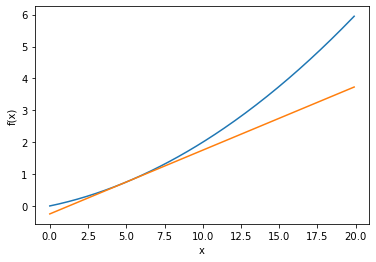

In [17]:
import numpy as np
import matplotlib.pylab as plt

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 4.3.3

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2

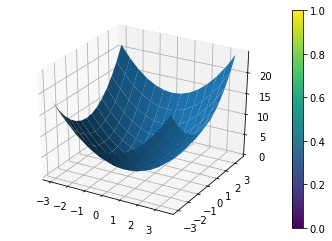

In [19]:
from mpl_toolkits.mplot3d import Axes3D

domain = np.arange(-3, 4, 0.5)
x, y = np.meshgrid(domain, domain)

X = np.vstack([np.ravel(x), np.ravel(y)]).T

z = np.array([function_2(x) for x in X]).reshape(len(domain), len(domain))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z)
fig.colorbar(surf)
fig.show()

In [20]:
def function_tmp1(x0):
    return x0**2 + 4.00**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [21]:
def function_tmp2(x1):
    return 3.00**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4

In [22]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 -fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


In [23]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


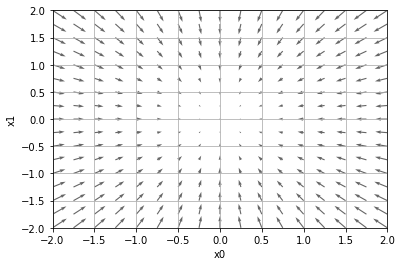

In [24]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

# 4.4.1

In [25]:
def gradient_desent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [26]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [27]:
init_x = np.array([-3.0, -4.0])
gradient_desent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10, -8.14814391e-10])

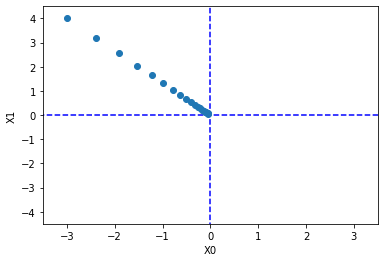

In [28]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_method.py
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [29]:
print(gradient_desent(function_2, np.array([-3.0, -4.0]), lr=10.0, step_num=100))
print(gradient_desent(function_2, np.array([-3.0, -4.0]), lr=1e-10, step_num=100))

[-2.58983747e+13  1.29524862e+12]
[-2.99999994 -3.99999992]


In [38]:
os.getcwd()
sys.path

['/home/jovyan/work/Documents/GitHub/zero-deeplearning',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/home/jovyan/.ipython',
 '..',
 '..',
 '..',
 '..',
 '..',
 '..']

# 4.4.2

In [42]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/gradient_simplenet.py
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # simpleNet.W(instance変数)を書き換えて勾配を求めている。
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
                
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.11307287  0.45962042 -0.57269329]
 [ 0.16960931  0.68943063 -0.85903993]]


In [ ]:
net = simpleNet()
print(net.W)

In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

In [ ]:
t = np.array([0, 0, 1]) # 正解ラベル
net.loss(x, t)

In [ ]:
dw = numerical_gradient(lambda _: net.loss(x, t), net.W)
dw

# 4.5.1

In [43]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    
    def __init__(self, input_size: int, hidden_size: int, output_size: int, weight_init_std: float = 0.01):
        self.params = {}
        self.params['w1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)        
        
        self.params['w2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)
        
        a2 = np.dot(z1, w2) + b2
        y = softmax(a2)
        
        return y

    def loss(self, x, t):
        """ x: 入力データ y: 教師データ """
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        def loss_w(w):
            # wを更新した結果を用いてlossを計算するが、
            # numerical_gradient内で直接instance変数を書き換える処理が行われているので、
            # 引数として渡さなくともwの勾配が求まる
            return self.loss(x, t)
        
        grads = {}
        grads['w1'] = numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = numerical_gradient(loss_w, self.params['b2'])
        
        return grads

In [44]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
for k, v in net.params.items():
    print(k, v.shape)

w1 (784, 100)
b1 (100,)
w2 (100, 10)
b2 (10,)


In [47]:
x = np.random.rand(3, 784)
y = net.predict(x)
y

array([[0.10671142, 0.10280814, 0.10157128, 0.09714492, 0.099074  ,
        0.09202766, 0.10020892, 0.09551105, 0.1026211 , 0.10232152],
       [0.10681817, 0.1026972 , 0.10138209, 0.09717243, 0.09919089,
        0.09180173, 0.10035235, 0.0951077 , 0.10297684, 0.10250059],
       [0.10715021, 0.10252118, 0.10152034, 0.09690911, 0.09924169,
        0.09201334, 0.10034042, 0.09543632, 0.10308376, 0.10178364]])

In [51]:
x = np.random.rand(3, 784)
t = np.random.rand(3, 10)
y = net.numerical_gradient(x, t)
y

{'w1': array([[-2.57587132e-04, -1.10935246e-03, -1.78131438e-04, ...,
          5.97679017e-06,  1.66802994e-03,  1.03695124e-03],
        [-9.11218758e-04, -2.19475732e-03, -8.70588623e-04, ...,
          1.07975686e-04,  1.79033559e-03,  1.33173007e-03],
        [-4.38275625e-04, -1.21989926e-03, -5.05194326e-04, ...,
         -6.49727161e-05,  1.42550442e-03,  9.22654786e-04],
        ...,
        [-2.74458323e-04, -5.40067153e-04, -8.59574212e-05, ...,
          2.30552641e-04, -5.56864821e-05,  1.31301963e-04],
        [-7.32766330e-04, -1.40379911e-03, -7.13689949e-04, ...,
          1.41354881e-04,  5.23197083e-04,  5.62897862e-04],
        [-5.63667519e-04, -1.25973789e-03, -1.05449425e-04, ...,
          5.15796272e-04,  1.63633265e-04,  4.45447066e-04]]),
 'b1': array([-1.32293534e-03, -2.99505130e-03, -1.12840660e-03, -3.94027730e-04,
        -8.80884474e-04,  8.99225250e-04,  5.49783041e-04,  8.32596936e-04,
         2.11737921e-03, -1.45677896e-03, -7.39492934e-05,  1.443

# 4.5.2

train acc, test acc | 0.134, 0.134
train acc, test acc | 0.7799333333333334, 0.7848
train acc, test acc | 0.87495, 0.8806
train acc, test acc | 0.897, 0.9021
train acc, test acc | 0.9081666666666667, 0.9113
train acc, test acc | 0.9144, 0.9183
train acc, test acc | 0.9212166666666667, 0.9235
train acc, test acc | 0.9246666666666666, 0.9264
train acc, test acc | 0.9292833333333334, 0.9321
train acc, test acc | 0.9314833333333333, 0.9349
train acc, test acc | 0.9355166666666667, 0.9379
train acc, test acc | 0.9375333333333333, 0.9393
train acc, test acc | 0.9403166666666667, 0.9401
train acc, test acc | 0.9422333333333334, 0.9425
train acc, test acc | 0.9443833333333334, 0.9427
train acc, test acc | 0.9461333333333334, 0.9451
train acc, test acc | 0.9477, 0.945


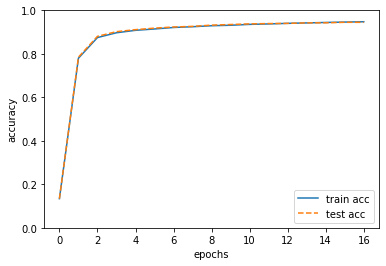

In [57]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py
    
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

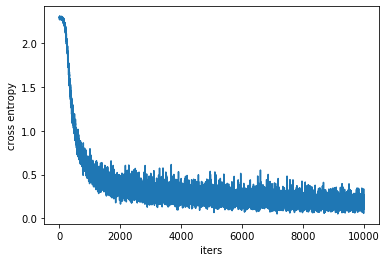

In [58]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iters")
plt.ylabel("cross entropy")
plt.show()

In [54]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)